# PreProcessing using scikit-learn


<img src="https://github.com/awantik/machine-learning-slides/blob/master/ML-Pipeline.png?raw=true">

## Agenda
1. Introduction to Preprocessing
2. StandardScaler
3. MinMaxScaler
4. RobustScaler
5. Normalization
6. Binarization
7. Encoding Categorical (Ordinal & Nominal) Features
8. Imputation
9. Polynomial Features
10. Custom Transformer
11. HashingVectorizer
12. Image using skimage

#### Common import

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline


## 1. Introduction to PreProcessing
* Learning algorithms have affinity towards certain pattern of data.
* Unscaled or unstandardized data have might have unacceptable prediction
* Learning algorithms understands only number, converting text image to number is required
* Preprocessing refers to transformation before feeding to machine learning


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp5.PNG?raw=true">


## 2. StandardScaler
* The StandardScaler assumes your data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.
* Calculate - Subtract mean of column & div by standard deviation



<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp4.PNG?raw=true">


* If data is not normally distributed, this is not the best scaler to use.

In [61]:
#Generating normally distributed data

df = pd.DataFrame({
    'x1': np.random.normal(0, 1, 10000),
    'x2': np.random.normal(10, 5, 10000),
    'x3': np.random.normal(50, 10, 10000)
})

In [62]:
df

,x1,x2,x3
0,0.114958,8.815471,53.939616
1,-1.307251,13.159229,48.388202
2,-0.477216,13.449564,52.838675
3,-0.392967,10.321005,32.183574
4,1.096203,9.697877,36.548437
...,...,...,...
9995,1.067573,8.178255,48.169186
9996,1.362173,10.783883,34.993459
9997,-1.376820,21.050908,50.865847
9998,0.377730,7.147263,44.310169


In [64]:
df.describe()

,x1,x2,x3
count,10000.000000,10000.000000,10000.000000
mean,0.007611,9.972396,49.970727
std,1.007820,5.037640,10.041677
min,-3.774633,-8.325642,13.359105
25%,-0.668729,6.566556,43.157996
50%,0.008236,9.914974,50.053070
75%,0.682753,13.392852,56.686862
max,4.293751,30.072155,88.805302


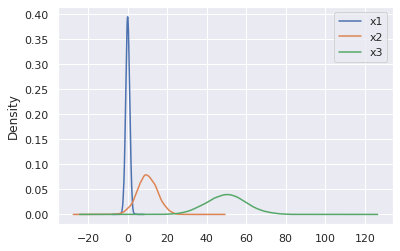

In [65]:
# plotting data

df.plot.kde()

In [66]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [67]:
data_tf = standardscaler.fit_transform(df)

In [68]:
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])

In [69]:
df

,x1,x2,x3
0,0.106519,-0.229668,0.395261
1,-1.304725,0.632636,-0.157604
2,-0.481089,0.690272,0.285619
3,-0.397490,0.069204,-1.771422
4,1.080199,-0.054496,-1.336725
...,...,...,...
9995,1.051790,-0.356165,-0.179415
9996,1.344118,0.161093,-1.491585
9997,-1.373757,2.199257,0.089145
9998,0.367265,-0.560833,-0.563735


In [70]:
df.describe()

,x1,x2,x3
count,1.000000e+04,1.000000e+04,1.000000e+04
mean,3.095302e-17,-1.747269e-16,-4.818812e-16
std,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.753083e+00,-3.632446e+00,-3.646149e+00
25%,-6.711256e-01,-6.761124e-01,-6.784795e-01
50%,6.193332e-04,-1.139910e-02,8.200552e-03
75%,6.699362e-01,6.790139e-01,6.688594e-01
max,4.253094e+00,3.990116e+00,3.867533e+00


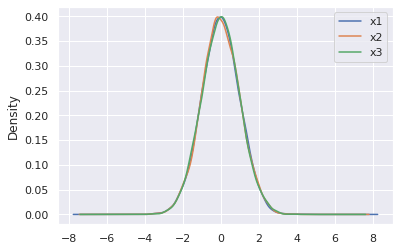

In [71]:
df.plot.kde()

## 3. MinMaxScaler
* One of the most popular
* Calculate - Subtract min of column & div by difference between max & min




<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp3.PNG?raw=true">



* Data shifts between 0 & 1
* If distribution not suitable for StandardScaler, this scaler works out.
* Sensitive to outliers

In [9]:
df = pd.DataFrame({
    # positive skew
    'x1': np.random.chisquare(8, 1000),
    # negative skew 
    'x2': np.random.beta(8, 2, 1000) * 40,
    # no skew
    'x3': np.random.normal(50, 3, 1000)
})

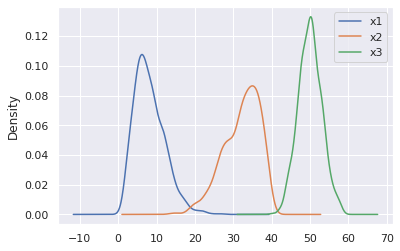

In [10]:
df.plot.kde()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
minmax = MinMaxScaler()
data_tf = minmax.fit_transform(df)

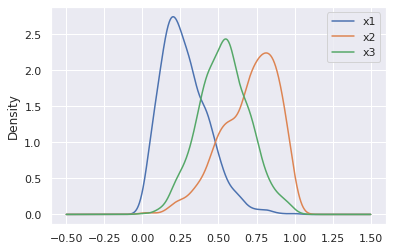

In [13]:
df = pd.DataFrame(data_tf,columns=['x1','x2','x3'])
df.plot.kde()

## 4. Robust Scaler
* Suited for data with outliers
* Calculate by subtracting 1st-quartile & div by difference between 3rd-quartile & 1st-quartile






<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp2.PNG?raw=true">

In [14]:
df = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 1, 1000), np.random.normal(1, 1, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 1, 1000), np.random.normal(50, 1, 25)]),
})

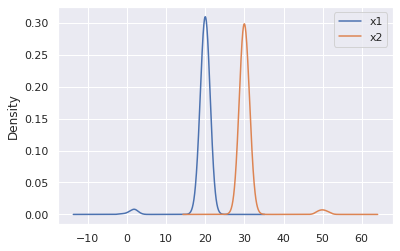

In [15]:
df.plot.kde()

In [16]:
from sklearn.preprocessing import RobustScaler
robustscaler = RobustScaler()

In [17]:
data_tf = robustscaler.fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2'])

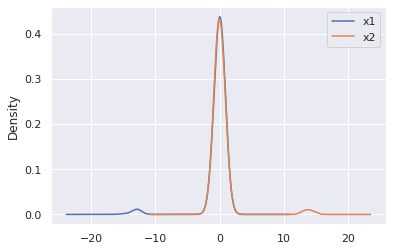

In [18]:
df.plot.kde()

## 5. Normalizer
* Each parameter value is obtained by dividing by magnitude


<img src="https://github.com/awantik/machine-learning-slides/blob/master/pp1.PNG?raw=true">
* Centralizes data to origin 

In [19]:
df = pd.DataFrame({
    'x1': np.random.randint(-100, 100, 1000).astype(float),
    'y1': np.random.randint(-20, 80, 1000).astype(float),
    'z1': np.random.randint(-50, 150, 1000).astype(float),
})

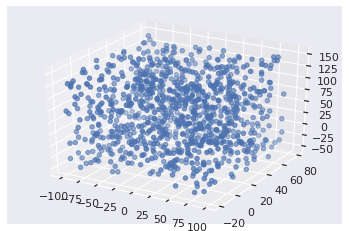

In [20]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

In [21]:
from sklearn.preprocessing import Normalizer

In [22]:
normalizer = Normalizer()
data_tf = normalizer.fit_transform(df)

In [23]:
df = pd.DataFrame(data_tf, columns=['x1','y1','z1'])

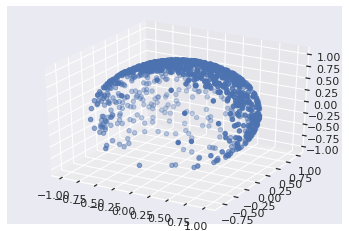

In [24]:
ax = plt.axes(projection='3d')
ax.scatter3D(df.x1, df.y1, df.z1)

## 6. Binarization
* Thresholding numerical values to binary values ( 0 or 1 )
* A few learning algorithms assume data to be in Bernoulli distribution - Bernoulli's Naive Bayes

In [25]:
X = np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])

In [26]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

In [27]:
data_tf = binarizer.fit_transform(X)

In [28]:
data_tf

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## 7. Encoding Categorical Values 
#### Encoding Ordinal Values
* Ordinal Values - Low, Medium & High. Relationship between values
* LabelEncoding with right mapping

In [29]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [30]:
df

,Age,Income
0,33,Low
1,44,Low
2,22,High
3,44,Medium
4,55,Medium
5,22,High


In [31]:
df.Income.map({'Low':1,'Medium':2,'High':3})

0    1
1    1
2    3
3    2
4    2
5    3
Name: Income, dtype: int64

#### PS: We can use transformer class for this as well, we will see that later

#### Encoding Nominal Values
* Nominal Values - Male, Female. No relationship between data
* One Hot Encoding for converting data into one-hot vector

In [32]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22,35],
    'Gender':['Male','Female','Male','Female','Male','Male','LGBTQ']})

In [33]:
df.Gender.unique()

array(['Male', 'Female', 'LGBTQ'], dtype=object)

In [34]:
print(pd.get_dummies(df.Gender))

   Female  LGBTQ  Male
0       0      0     1
1       1      0     0
2       0      0     1
3       1      0     0
4       0      0     1
5       0      0     1
6       0      1     0


In [35]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [36]:
le = LabelEncoder()
df['gender_tf'] = le.fit_transform(df.Gender)

In [37]:
df

,Age,Gender,gender_tf
0,33,Male,2
1,44,Female,0
2,22,Male,2
3,44,Female,0
4,55,Male,2
5,22,Male,2
6,35,LGBTQ,1


In [38]:
OneHotEncoder().fit_transform(df[['gender_tf']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [39]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Income':['Low','Low','High','Medium','Medium','High']})

In [40]:
df['Income_label'] = le.fit_transform(df.Income)

In [41]:
df

,Age,Income,Income_label
0,33,Low,1
1,44,Low,1
2,22,High,0
3,44,Medium,2
4,55,Medium,2
5,22,High,0


## 8. Imputation
* Missing values cannot be processed by learning algorithms
* Imputers can be used to infer value of missing data from existing data

In [42]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5]
})

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

In [44]:
df_copy = imputer.fit_transform(df)

In [45]:
df_copy

array([[1. , 3. ],
       [2. , 4. ],
       [3. , 1. ],
       [4. , 3.4],
       [3.4, 4. ],
       [7. , 5. ]])

## 9. Polynomial Features
* Deriving non-linear feature by coverting data into higher degree
* Used with linear regression to learn model of higher degree

In [46]:
df = pd.DataFrame({'A':[1,2,3,4,5], 'B':[2,3,4,5,6]})
df

,A,B
0,1,2
1,2,3
2,3,4
3,4,5
4,5,6


In [47]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2)

In [48]:
pol.fit_transform(df)

array([[ 1.,  1.,  2.,  1.,  2.,  4.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  3.,  4.,  9., 12., 16.],
       [ 1.,  4.,  5., 16., 20., 25.],
       [ 1.,  5.,  6., 25., 30., 36.]])

## 10. Custom Transformer 
* Often, you will want to convert an existing Python function into a transformer to assist in data cleaning or processing.
* FunctionTransformer is used to create one Transformer 
* validate = False, is required for string columns

In [49]:
from sklearn.preprocessing import FunctionTransformer

In [50]:
def mapping(x):
    x['Age'] = x['Age']+2
    x['Counter'] = x['Counter'] * 2
    return x

In [51]:
customtransformer = FunctionTransformer(mapping, validate=False)

In [52]:
df = pd.DataFrame({
    'Age':[33,44,22,44,55,22],
    'Counter':[3,4,2,4,5,2],
     })
df

,Age,Counter
0,33,3
1,44,4
2,22,2
3,44,4
4,55,5
5,22,2


In [53]:
customtransformer.transform(df)

,Age,Counter
0,35,6
1,46,8
2,24,4
3,46,8
4,57,10
5,24,4


## 11. HashingVectorizer
* All above techniques converts data into table where each word is converted to column
* Learning on data with lakhs of columns is difficult to process
* HashingVectorizer is an useful technique for out-of-core learning
* Multiple words are hashed to limited column
* Limitation - Hashed value to word mapping is not possible

In [54]:
df = pd.DataFrame({
    'A':[1,2,3,4,np.nan,7],
    'B':[3,4,1,np.nan,4,5],
    'Text':['I','am','going','the','opposite','way']
})

In [55]:
from sklearn.feature_extraction.text import HashingVectorizer
hv = HashingVectorizer(n_features=5)

In [56]:
hv.fit_transform(df.Text).toarray()

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0., -1.,  0.],
       [ 0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## 12. Image Processing using skimage
* skimage doesn't come with anaconda. install with 'pip install skimage'
* Images should be converted from 0-255 scale to 0-1 scale.
* skimage takes image path & returns numpy array
* images consist of 3 dimension


In [57]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
from skimage.io import imread,imshow

In [ ]:
image = imread('funny.jpeg')

In [ ]:
image.shape

In [ ]:
image[0]

In [ ]:
imshow(image)

In [ ]:
from skimage.color import rgb2gray

In [ ]:
rgb2gray(image).shape

In [ ]:
print(rgb2gray(image))

In [ ]:
imshow(rgb2gray(image))

In [ ]:
from skimage.transform import resize

In [ ]:
imshow(resize(image, (200,200)))